# Phase 4 

# Business Problem (NT)

# Data Understanding (JR)

# Data Preparation (JR)

# MLP Model (NT)

# Logistic Regression Model (ML)

# Evaluation (ML)

# Conclusion (ML)

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split

## global variables

In [36]:
train_data_dir = 'chest_xray/train/'
val_data_dir = 'chest_xray/val/'
test_data_dir = 'chest_xray/test/'

image_x_size = 500
image_y_size = 500

train_batch_size = 5216
val_batch_size = 16
test_batch_size = 624

## generating datasets

In [4]:
val_generator = ImageDataGenerator().flow_from_directory(
        val_data_dir, 
        target_size=(image_x_size, image_y_size), batch_size=val_batch_size)

train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(image_x_size, image_y_size), batch_size=train_batch_size)

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(image_x_size, image_y_size), batch_size=test_batch_size)

# Create the datasets
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)

Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## sample images

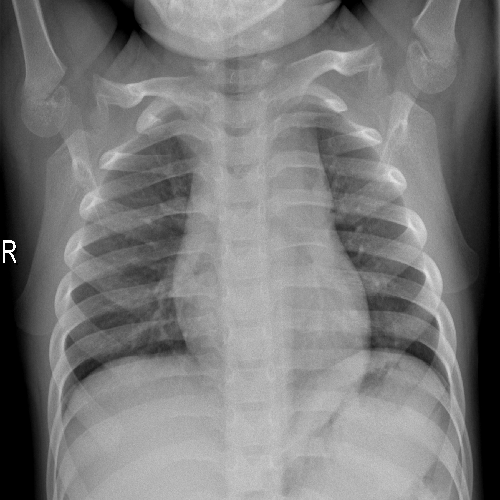

In [5]:
array_to_img(train_images[10])

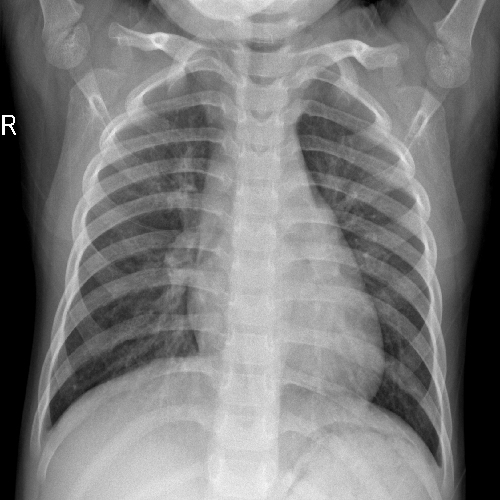

In [6]:
array_to_img(train_images[130])

In [7]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(val_images))
print(np.shape(val_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(5216, 500, 500, 3)
(5216, 2)
(16, 500, 500, 3)
(16, 2)
(624, 500, 500, 3)
(624, 2)


##  `train_images`, `val_images` and `test_images`

In [8]:
# Reshape the train images 
train_img_unrow = train_images.reshape(train_batch_size, -1).T
np.shape(train_img_unrow)

(750000, 5216)

transform `val_images` 

In [9]:
# Reshape the val images 
val_img_unrow = val_images.reshape(val_batch_size, -1).T

In [10]:
# Preview the shape of val_img_unrow
np.shape(val_img_unrow)

(750000, 16)

transform `test_images` in a similar way.

In [11]:
# Define appropriate m 
test_img_unrow = test_images.reshape(test_batch_size, -1).T

In [12]:
# Preview the shape of test_img_unrow
np.shape(test_img_unrow)

(750000, 624)

# `train_labels`, `val_labels` and `test_labels`

In [13]:
train_labels.shape,val_labels.shape, test_labels.shape

((5216, 2), (16, 2), (624, 2))

In [14]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [15]:
# this was stored using keras.preprocessing_image, and you can get more info using the command train_generator.class_indices
train_generator.class_indices, val_generator.class_indices, test_generator.class_indices

({'NORMAL': 0, 'PNEUMONIA': 1},
 {'NORMAL': 0, 'PNEUMONIA': 1},
 {'NORMAL': 0, 'PNEUMONIA': 1})

In [16]:
train_labels_final = train_labels.T[[1]]

In [17]:
np.shape(train_labels_final)

(1, 5216)

In [18]:
val_labels_final = val_labels.T[[1]]
np.shape(val_labels_final)

(1, 16)

In [19]:
test_labels_final = test_labels.T[[1]]

In [20]:
np.shape(test_labels_final)

(1, 624)

1. First, use array_to_image() again on the original train_images with index 240 to look at this particular image
2. Use train_labels_final to get the 240th label

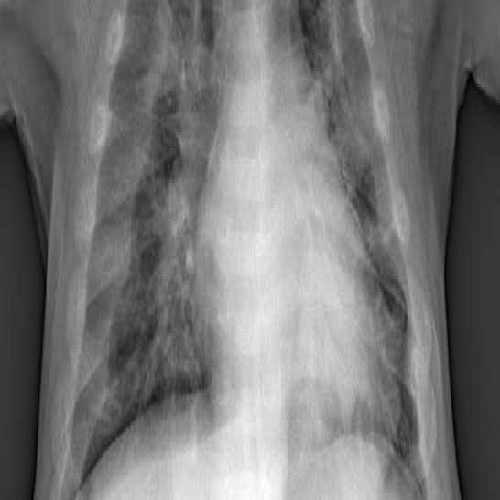

In [21]:
array_to_img(train_images[240])

In [22]:
train_labels_final[:,240]

array([1.], dtype=float32)

## Standardize the data

In [23]:
train_img_final = train_img_unrow/255
val_img_final = val_img_unrow/255
test_img_final = test_img_unrow/255

type(train_img_unrow)

numpy.ndarray

In [24]:
train_img_final.shape

(750000, 5216)

## Build a logistic regression-based neural network

   - Initialize the parameters of the model
   - Perform forward propagation, and calculate the current loss
   - Perform backward propagation (which is basically calculating the current gradient)
   - Update the parameters (gradient descent)

The cost function is then given by:
$$J(w,b) = \dfrac{1}{l}\displaystyle\sum^l_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})$$

$w$ and $b$ are the unknown parameters to start with: 
- remember that $b$ is a scalar
- $w$ however, is a vector of shape $n$ x $1$, with $n$ being `horizontal_pixel x vertical_pixel x 3`

# Baseline - Logistic Regression

Using gradient descent

#### Initialize b and w

In [25]:
b = 0

In [26]:
def init_w(n):
    w = np.zeros((n, 1))
    return w

In [27]:
w = init_w(image_x_size*image_y_size*3)

#### Forward Propagation

In [28]:
def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))    
    dw = (1/l) * np.dot(x,(y_hat - y).T)
    db = (1/l) * np.sum(y_hat - y)
    return dw, db, cost

In [29]:
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

In [30]:
print(dw)

print(db)

print(cost)

[[-0.05008308]
 [-0.05008308]
 [-0.05008308]
 ...
 [-0.03565237]
 [-0.03565237]
 [-0.03565237]]
-0.2429064417177914
0.6931471805599453


#### Optimization

$$w := w - \alpha * dw$$
$$b := b - \alpha * db$$

In [31]:
def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, x, y)    
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

#### Predictions

In [32]:
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = np.zeros((1, l))
    w = w.reshape(x.shape[0], 1)
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b))) 
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        if (y_hat[0,i] > 0.5): 
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    return y_prediction

## Overall Model - Baseline

In [33]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test errors
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {'costs': costs, 
              'y_pred_test': y_pred_test,  
              'y_pred_train' : y_pred_train,  
              'w' : w, 
              'b' : b, 
              'learning_rate' : learning_rate, 
              'num_iterations': num_iterations}
    
    return output

#### using train and val

In [34]:
output = model(train_img_final, train_labels_final, val_img_final, val_labels_final, 
               num_iterations=200, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147


/var/folders/fh/_3l8mb_s4j967nwd3wg1v2d40000gn/T/ipykernel_69492/3547166593.py:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))
/var/folders/fh/_3l8mb_s4j967nwd3wg1v2d40000gn/T/ipykernel_69492/3547166593.py:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))


Cost after iteration 50: nan
Cost after iteration 100: nan
Cost after iteration 150: nan
train accuracy: 93.21319018404908 %
test accuracy: 87.5 %


In [ ]:
train_img_final.shape

In [35]:
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final, 
               num_iterations=200, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147


/var/folders/fh/_3l8mb_s4j967nwd3wg1v2d40000gn/T/ipykernel_69492/3547166593.py:4: RuntimeWarning: divide by zero encountered in log
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))
/var/folders/fh/_3l8mb_s4j967nwd3wg1v2d40000gn/T/ipykernel_69492/3547166593.py:4: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))


Cost after iteration 50: nan
Cost after iteration 100: nan
Cost after iteration 150: nan
train accuracy: 93.21319018404908 %
test accuracy: 79.00641025641025 %


In [ ]:
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final, 
               num_iterations=500, learning_rate=0.005, print_cost=True)

# MLP

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(filters=32, 
                        kernel_size=(2,2),
                        strides=(1,1),
                        activation='relu',
                        padding = 'same',
                        input_shape=(image_x_size, image_y_size, 3),
                        data_format = 'channels_last'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2),
                     strides=2))
model_1.add(layers.Flatten())        
model_1.add(layers.Dense(128))
model_1.add(layers.Activation('relu'))
#model_1.add(layers.Dropout(0.25))
model_1.add(layers.Dense(2))
model_1.add(layers.Activation('sigmoid'))

In [ ]:
model_1.summary()

In [ ]:
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_1.fit(train_images_mlp, train_labels, epochs=5, batch_size=50)

In [ ]:
val_loss, val_acc = model_1.evaluate(val_images_mlp, val_labels)

In [ ]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(filters=32, 
                        kernel_size=(2,2),
                        strides=(1,1),
                        activation='relu',
                        padding = 'same',
                        input_shape=(image_x_size, image_y_size, 3),
                        data_format = 'channels_last'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2),
                     strides=2))
model_2.add(layers.Flatten())        
model_2.add(layers.Dense(512))
model_2.add(layers.Activation('relu'))
#model_1.add(layers.Dropout(0.25))
model_2.add(layers.Dense(2))
model_2.add(layers.Activation('sigmoid'))
model_2.summary()

In [ ]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_2.fit(train_images_mlp, train_labels, epochs=5, batch_size=50)

In [ ]:
val_loss, val_acc = model_2.evaluate(val_images_mlp, val_labels)

In [ ]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(filters=32, 
                        kernel_size=(2,2),
                        strides=(1,1),
                        activation='relu',
                        padding = 'same',
                        input_shape=(image_x_size, image_y_size, 3),
                        data_format = 'channels_last'))
model_3.add(layers.MaxPooling2D(pool_size=(2,2),
                     strides=2))
model_3.add(layers.Flatten())        
model_3.add(layers.Dense(4096))
model_3.add(layers.Activation('relu'))
#model_1.add(layers.Dropout(0.25))
model_3.add(layers.Dense(2))
model_3.add(layers.Activation('sigmoid'))
model_3.summary()

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_3.fit(train_images_mlp, train_labels, epochs=5, batch_size=50)

In [ ]:
val_loss, val_acc = model_2.evaluate(val_images_mlp, val_labels)